In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
bank=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\LogisticRegression\\bank-full (1).csv",sep=";")

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank.isna().sum() # there is no null values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
bank.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [10]:
bank.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [11]:
bank.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [12]:
bank.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [13]:
bank.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
bank.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [15]:
bank.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [16]:
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [17]:
#removing un important features
bank.drop(columns=["education","contact","day","month","duration","campaign","pdays","previous","poutcome"],axis=1,inplace=True)
bank.head()

,age,job,marital,default,balance,housing,loan,y
0,58,management,married,no,2143,yes,no,no
1,44,technician,single,no,29,yes,no,no
2,33,entrepreneur,married,no,2,yes,yes,no
3,47,blue-collar,married,no,1506,yes,no,no
4,33,unknown,single,no,1,no,no,no


In [18]:
bank.shape

(45211, 8)

<AxesSubplot:xlabel='balance', ylabel='Density'>

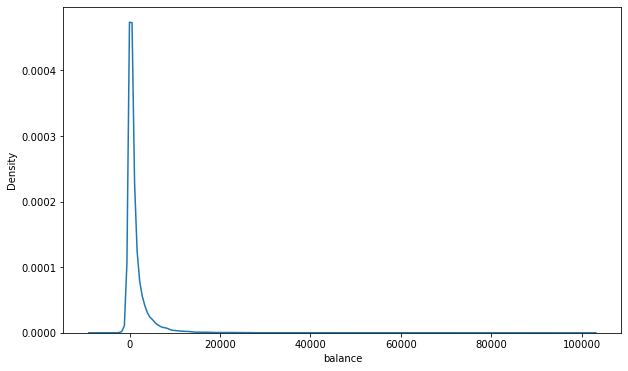

In [19]:
#data visualisation
plt.figure(figsize=(10,6))
sns.distplot(bank["balance"],hist=False)


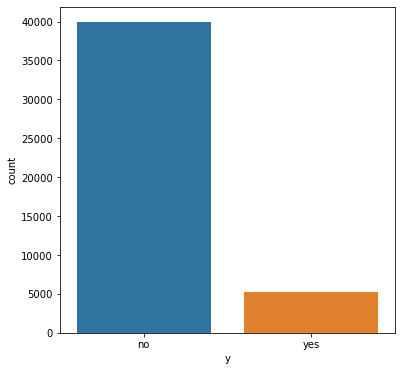

In [20]:
plt.figure(figsize=(6,6))
sns.countplot("y",data=bank)
plt.show()

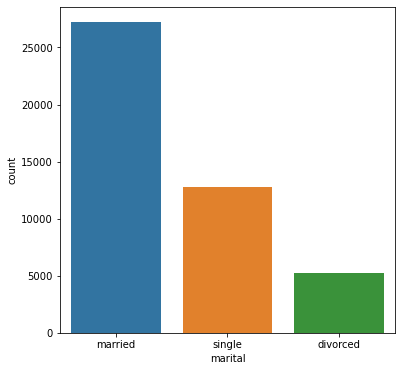

In [21]:
plt.figure(figsize=(6,6))
sns.countplot("marital",data=bank)
plt.show()

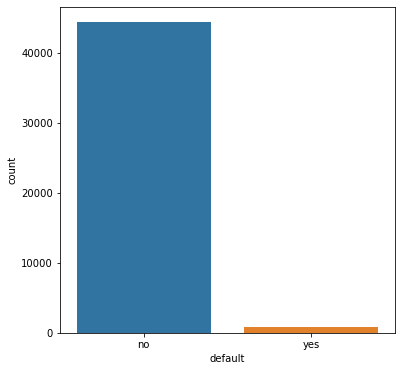

In [22]:
plt.figure(figsize=(6,6))
sns.countplot("default",data=bank)
plt.show()

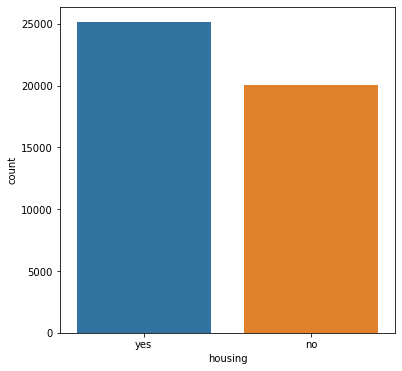

In [23]:
plt.figure(figsize=(6,6))
sns.countplot("housing",data=bank)
plt.show()

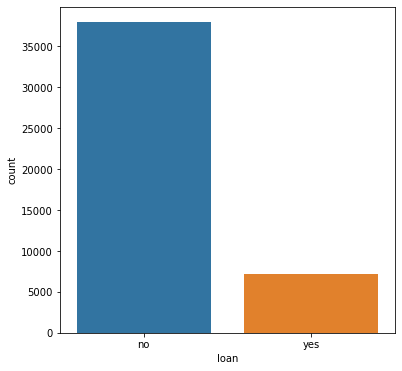

In [24]:
plt.figure(figsize=(6,6))
sns.countplot("loan",data=bank)
plt.show()

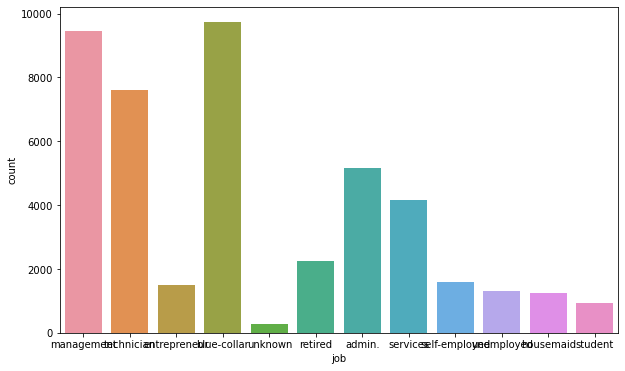

In [25]:
plt.figure(figsize=(10,6))
sns.countplot("job",data=bank)
plt.show()

In [26]:
#converting categorical data into numeric data 
from sklearn.preprocessing import LabelEncoder

In [27]:
label=LabelEncoder()

In [28]:
bank["job"]=label.fit_transform(bank.job)
bank["marital"]=label.fit_transform(bank.marital)
bank["default"]=label.fit_transform(bank.default)
bank["housing"]=label.fit_transform(bank.housing)
bank["loan"]=label.fit_transform(bank.loan)
bank["y"]=label.fit_transform(bank["y"])
bank

,age,job,marital,default,balance,housing,loan,y
0,58,4,1,0,2143,1,0,0
1,44,9,2,0,29,1,0,0
2,33,2,1,0,2,1,1,0
3,47,1,1,0,1506,1,0,0
4,33,11,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...
45206,51,9,1,0,825,0,0,1
45207,71,5,0,0,1729,0,0,1
45208,72,5,1,0,5715,0,0,1
45209,57,1,1,0,668,0,0,0


In [29]:
bank.dtypes

age        int64
job        int32
marital    int32
default    int32
balance    int64
housing    int32
loan       int32
y          int32
dtype: object

In [30]:
bank.shape

(45211, 8)

In [31]:
#training and tsting data
x=bank.drop(columns="y",axis=1)
y=bank[["y"]]

In [32]:
x.head()

,age,job,marital,default,balance,housing,loan
0,58,4,1,0,2143,1,0
1,44,9,2,0,29,1,0
2,33,2,1,0,2,1,1
3,47,1,1,0,1506,1,0
4,33,11,2,0,1,0,0


In [33]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36168, 7), (9043, 7), (36168, 1), (9043, 1))

In [37]:
#model building
from sklearn.linear_model import LogisticRegression

In [38]:
log_model=LogisticRegression()

In [39]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred_train=log_model.predict(x_train)
y_pred_test=log_model.predict(x_test)

In [41]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
#train data
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [44]:
print('Accuracy score:',accuracy_score(y_train,y_pred_train))

Accuracy score: 0.8829075425790754


In [45]:
print('Confusion Matrix:\n\n',confusion_matrix(y_train,y_pred_train))


Confusion Matrix:

 [[31932     4]
 [ 4231     1]]


In [46]:
print('Classification Report:\n\n',classification_report(y_train,y_pred_train))

Classification Report:

               precision    recall  f1-score   support

           0       0.88      1.00      0.94     31936
           1       0.20      0.00      0.00      4232

    accuracy                           0.88     36168
   macro avg       0.54      0.50      0.47     36168
weighted avg       0.80      0.88      0.83     36168



In [47]:
#test data
print('Accuracy Score:',accuracy_score(y_test,y_pred_test))

Accuracy Score: 0.8826716797522945


In [48]:
print('Confusion matrix:\n\n',confusion_matrix(y_test,y_pred_test))


Confusion matrix:

 [[7981    5]
 [1056    1]]


In [49]:
print('Classification Report: \n\n',classification_report(y_test,y_pred_test))

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.94      7986
           1       0.17      0.00      0.00      1057

    accuracy                           0.88      9043
   macro avg       0.52      0.50      0.47      9043
weighted avg       0.80      0.88      0.83      9043



<AxesSubplot:>

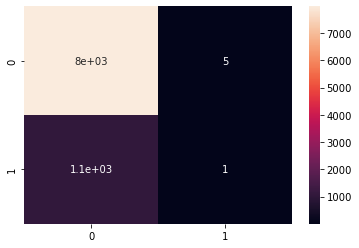

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)

In [51]:
from sklearn.metrics import roc_curve,roc_auc_score

In [52]:
fpr,tpr,threshold=roc_curve(y,log_model.predict_proba(x)[:,1])

In [53]:
auc=roc_auc_score(y_test,y_pred_test)
print('AUC score:',auc)

AUC score: 0.5001599890631689


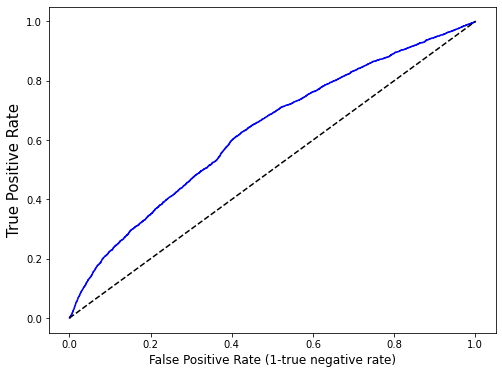

In [54]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)
plt.show()

In [55]:
y_test.value_counts()

y
0    7986
1    1057
dtype: int64

In [56]:
pd.DataFrame(y_pred_test).value_counts()

0    9037
1       6
dtype: int64

In [57]:
#here the prediction is not good

0    39922
1     5289
Name: y, dtype: int64

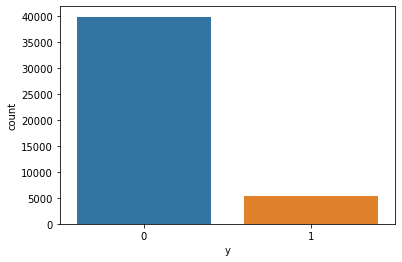

In [58]:
#imbalanced data
sns.countplot(bank.y)
bank.y.value_counts()

In [59]:
#There is no balance between the two categories of the column "y". Category "1" is highly low compared to category "0", this may affect the accuracy of the model so we need to balance the data.

In [60]:
#balancing data
cat_0=bank[bank.y==0]
cat_0.shape

(39922, 8)

In [61]:
cat_1=bank[bank.y==1]
cat_1.shape

(5289, 8)

In [62]:
sample_cat_0=cat_0.sample(5289,random_state=123)
sample_cat_0.shape

(5289, 8)

In [63]:
sample_data=pd.concat([sample_cat_0,cat_1])
sample_data.shape

(10578, 8)

In [64]:
sample_data.head()

,age,job,marital,default,balance,housing,loan,y
36755,41,4,2,0,5548,1,0,0
21913,44,4,1,0,0,0,0,0
27933,29,11,2,0,1502,0,0,0
41893,60,4,1,0,0,0,0,0
25719,30,4,2,0,4896,0,0,0


In [65]:
sample_data.reset_index(inplace=True)

In [66]:
sample_data.head()

,index,age,job,marital,default,balance,housing,loan,y
0,36755,41,4,2,0,5548,1,0,0
1,21913,44,4,1,0,0,0,0,0
2,27933,29,11,2,0,1502,0,0,0
3,41893,60,4,1,0,0,0,0,0
4,25719,30,4,2,0,4896,0,0,0


In [67]:
sample_data.drop(columns="index",axis=1,inplace=True)

In [68]:
sample_data.head()

,age,job,marital,default,balance,housing,loan,y
0,41,4,2,0,5548,1,0,0
1,44,4,1,0,0,0,0,0
2,29,11,2,0,1502,0,0,0
3,60,4,1,0,0,0,0,0
4,30,4,2,0,4896,0,0,0


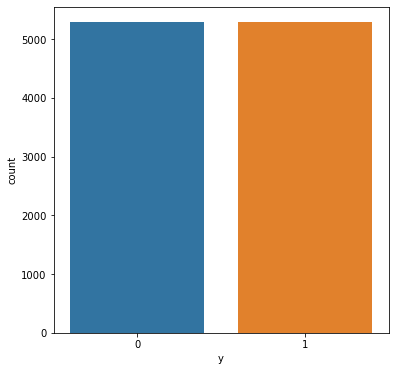

In [69]:
plt.figure(figsize=(6,6))
sns.countplot("y",data=sample_data)
plt.show()

In [70]:
sample_x=sample_data.drop(columns=["y"],axis=1)
sample_y=sample_data[["y"]]

In [71]:
sample_x.head()

,age,job,marital,default,balance,housing,loan
0,41,4,2,0,5548,1,0
1,44,4,1,0,0,0,0
2,29,11,2,0,1502,0,0
3,60,4,1,0,0,0,0
4,30,4,2,0,4896,0,0


In [72]:
sample_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [73]:
#training and testing
sample_x_train,sample_x_test,sample_y_train,sample_y_test=train_test_split(sample_x,sample_y,test_size=0.2,random_state=12)

In [74]:
sample_x_train

,age,job,marital,default,balance,housing,loan
5311,31,9,2,0,703,1,0
8849,57,4,1,0,1318,0,0
4555,54,1,1,0,219,1,0
4698,23,7,2,0,105,1,1
10147,26,9,1,0,267,1,0
...,...,...,...,...,...,...,...
3714,60,4,2,0,0,0,1
7409,24,6,2,0,2376,0,0
3325,31,1,1,0,392,1,0
9606,25,1,2,0,303,0,0


In [75]:
sample_model=LogisticRegression()

In [76]:
sample_model.fit(sample_x_train,sample_y_train)

LogisticRegression()

In [77]:
sample_y_pred_train=sample_model.predict(sample_x_train)

In [78]:
sample_y_pred_test=sample_model.predict(sample_x_test)

In [79]:
print("Confusion Matrix :\n",confusion_matrix(sample_y_test,sample_y_pred_test))

Confusion Matrix :
 [[673 396]
 [421 626]]


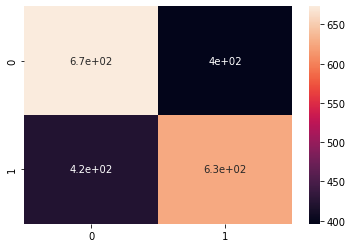

In [80]:
sns.heatmap(confusion_matrix(sample_y_test,sample_y_pred_test),annot=True)
plt.show()

In [81]:
print(classification_report(sample_y_test,sample_y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1069
           1       0.61      0.60      0.61      1047

    accuracy                           0.61      2116
   macro avg       0.61      0.61      0.61      2116
weighted avg       0.61      0.61      0.61      2116



In [82]:
auc=roc_auc_score(sample_y_test,sample_y_pred_test)
auc

0.6137295475602706

In [83]:
fpr,tpr,threshold=roc_curve(sample_y,sample_model.predict_proba(sample_x)[:,1])

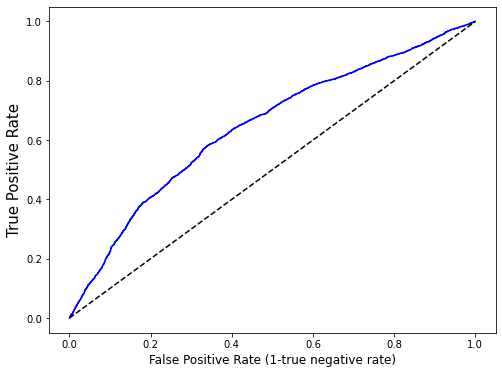

In [84]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="blue",label="logit model(area=%0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)
plt.show()

In [85]:
bank.shape

(45211, 8)

In [86]:
sample_data.shape

(10578, 8)

In [87]:
accuracy_score(sample_y_test,sample_y_pred_test)

0.6138941398865785

In [88]:
accuracy_score(sample_y_train,sample_y_pred_train)

0.618293547624675

In [89]:
sample_y_test.value_counts()

y
0    1069
1    1047
dtype: int64

In [90]:
pd.DataFrame(sample_y_pred_test).value_counts()

0    1094
1    1022
dtype: int64

In [91]:
#here the predivtion is pretty goodone

In [92]:
#oversampling-SMOTE
!pip install imblearn

In [93]:
#data preperstion
from imblearn.over_sampling import SMOTE

In [94]:
smote=SMOTE(sampling_strategy="minority",random_state=123)

In [95]:
x_sm,y_sm=smote.fit_resample(x,y)

In [96]:
x_sm.shape,y_sm.shape

((79844, 7), (79844, 1))

In [97]:
smote_data=pd.concat([x_sm,y_sm],axis=1)
smote_data

,age,job,marital,default,balance,housing,loan,y
0,58,4,1,0,2143,1,0,0
1,44,9,2,0,29,1,0,0
2,33,2,1,0,2,1,1,0
3,47,1,1,0,1506,1,0,0
4,33,11,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...
79839,50,3,1,0,1311,0,0,1
79840,26,5,2,0,503,0,0,1
79841,25,0,2,0,1871,0,0,1
79842,28,1,0,0,72,0,0,1


In [98]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=4)

In [99]:
x_sm.shape,y_sm.shape

((79844, 7), (79844, 1))

In [100]:
x_sm.shape,y_sm.shape

((79844, 7), (79844, 1))

<AxesSubplot:xlabel='y', ylabel='count'>

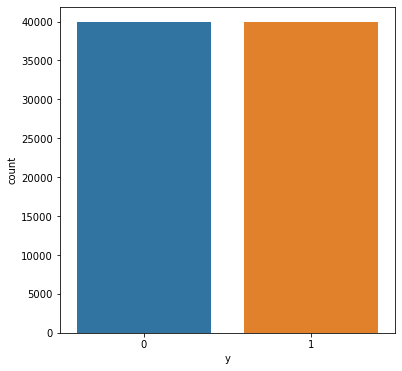

In [101]:
plt.figure(figsize=(6,6))
sns.countplot("y",data=smote_data)

In [102]:
sm_model=LogisticRegression()

In [103]:
sm_model.fit(x_sm_train,y_sm_train)

LogisticRegression()

In [104]:
y_sm_test_pred=sm_model.predict(x_sm_test)

In [105]:
y_sm_test_pred.shape

(15969,)

In [106]:
confusion_matrix(y_sm_test,y_sm_test_pred)

array([[5178, 2790],
       [1736, 6265]], dtype=int64)

In [107]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      7968
           1       0.69      0.78      0.73      8001

    accuracy                           0.72     15969
   macro avg       0.72      0.72      0.72     15969
weighted avg       0.72      0.72      0.72     15969



In [108]:
print("AUC score:",roc_auc_score(y_sm_test,y_sm_test_pred))

AUC score: 0.7164382596000802


In [109]:
fpr,tpr,threshold=roc_curve(y_sm,sm_model.predict_proba(x_sm)[:,1])

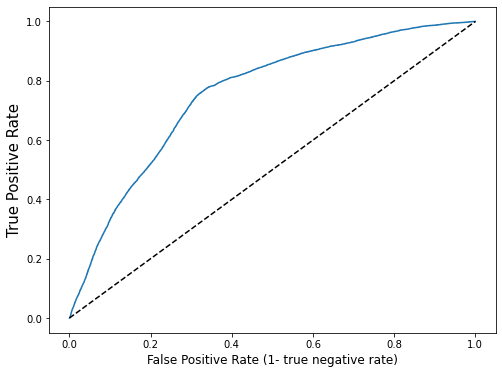

In [110]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="logit model(area= 0%.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1- true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)
plt.show()

In [111]:
accuracy_score(y_sm_test,y_sm_test_pred)

0.716575865739871

In [112]:
print(classification_report(sample_y_test,sample_y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1069
           1       0.61      0.60      0.61      1047

    accuracy                           0.61      2116
   macro avg       0.61      0.61      0.61      2116
weighted avg       0.61      0.61      0.61      2116



In [113]:
y_sm_test.value_counts()

y
1    8001
0    7968
dtype: int64

In [114]:
pd.DataFrame(y_sm_test_pred).value_counts()

1    9055
0    6914
dtype: int64

In [115]:
#model created by manual sampling gives pretty good prediction
#even the first model gives far better accuracy, its precision and recall are worse so the prediction might not be as expected